# A/B Testing. Sample Size Selection

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline  

In [2]:
days = 50

In [3]:
mu_control, sigma_control, n_control          = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100, 20, 100

In [4]:
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [5]:
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'

    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'

    
    user_data = user_data.append(day_data_experiment).append(day_data_control)
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value, 
                          user_data[user_data.group == 'control'].value)

    
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
    
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1


In [6]:
daily_data

,group,value,date
0,control,98.128558,1
1,experiment,101.633116,1
0,control,99.575368,2
1,experiment,101.318143,2
0,control,100.696410,3
...,...,...,...
1,experiment,100.175792,48
0,control,99.818548,49
1,experiment,100.206096,49
0,control,99.784847,50


<AxesSubplot:xlabel='date', ylabel='value'>

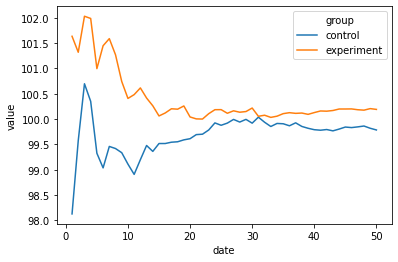

In [7]:
sns.lineplot(data=daily_data, x="date", y="value", hue='group')

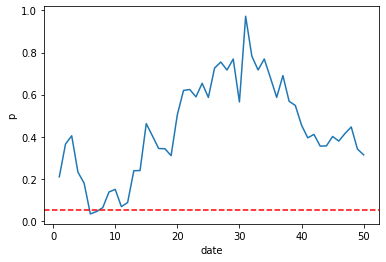

In [8]:
ax = sns.lineplot(data=stat_result, x="date", y="p")
ax.axhline(0.05, ls='--', color='red')

In [9]:
p_values = []

In [10]:
days = 10000

In [11]:
mu_control, sigma_control, n_control = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100, 20, 100

In [12]:
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    fit = stats.ttest_ind(daily_data_control, daily_data_experiment)
    
    p_values.append(fit[1])

/var/folders/lz/xl4dh0dx24v8w37756gky0540000gn/T/ipykernel_26930/2528428989.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p_values, kde=False)


<AxesSubplot:>

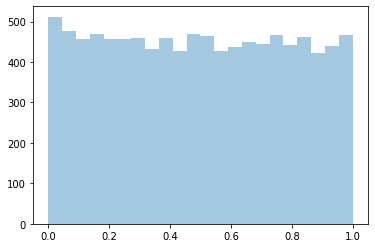

In [13]:
sns.distplot(p_values, kde=False)

In [15]:
mu_control, sigma_control, n_control = 101, 8, 400

In [16]:
n_positive = 0
total_trials = 10000
threshold = 100.65

In [17]:
for i in range(total_trials):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    
    if daily_data_control.mean() > threshold:
        n_positive += 1
        

In [18]:
n_positive / total_trials

0.8076

In [19]:
from statsmodels.stats.power import TTestIndPower

In [20]:
mu_control,    sigma_control    = 100, 8
mu_experiment, sigma_experiment = 110, 8

In [21]:
d = (mu_experiment - mu_control) / ((sigma_control**2 + sigma_experiment**2) / 2) ** 0.5

In [22]:
d

1.25

In [23]:
effect = d
alpha = 0.05
power = 0.95
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 17.655


In [24]:
n_control = n_experiment = 18

total_trials = 1000
n_positive = 0

In [25]:
for i in range(total_trials):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)

    fit = stats.ttest_ind(daily_data_control, 
                          daily_data_experiment)
    
    if fit[1] < 0.05:
        n_positive += 1

In [26]:
n_positive / total_trials

0.954